## PCA experimentation

The ideas here is to test how the vector behaves through the PCA from high dimention to small dimention.

For example, $PCA(\overline{x}) \stackrel{?}{=} \overline{PCA(x)}$

In [ ]:
import numpy as np

# Set the dimensions
n = 1000

# Create two data groups with different mean values
mean1 = np.zeros(n)
mean2 = np.ones(n)

# Random vector of size n
feature_vector = np.random.rand(n)
feature_vector = feature_vector / np.linalg.norm(feature_vector)

# Generate data from Gaussian distribution
group1 = np.random.normal(loc=mean1, scale=1.0, size=(100, n))
group2 = np.random.normal(loc=mean1, scale=1.0, size=(100, n))

alpha = 2
print(feature_vector.max)

group1 = group1 + feature_vector*alpha
group2 = group2 - feature_vector*alpha

print("Group 1 shape:", group1.shape)
print("Group 2 shape:", group2.shape)

Group 1 shape: (100, 1000)
Group 2 shape: (100, 1000)


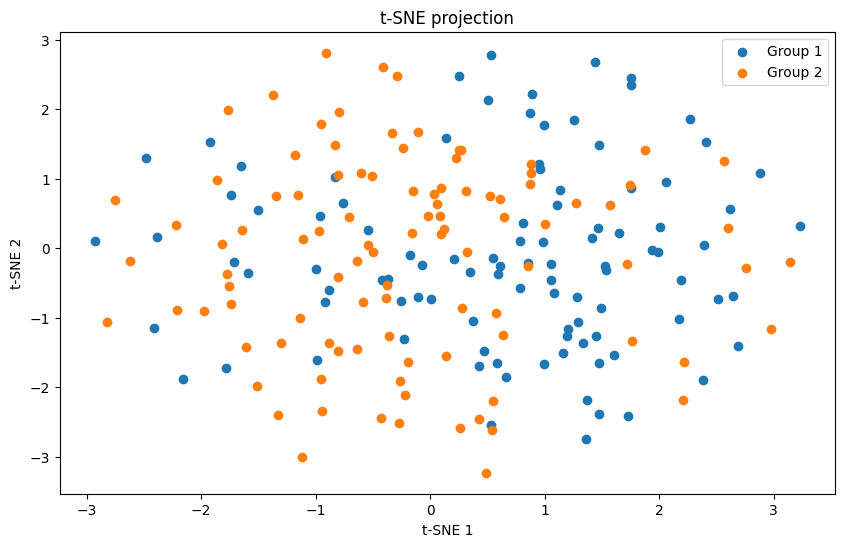

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Combine the data groups
data = np.vstack((group1, group2))

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(data)

# Plot the t-SNE results
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:100, 0], tsne_results[:100, 1], label='Group 1')
plt.scatter(tsne_results[100:, 0], tsne_results[100:, 1], label='Group 2')
plt.legend()
plt.title('t-SNE projection')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

<Figure size 1000x600 with 0 Axes>

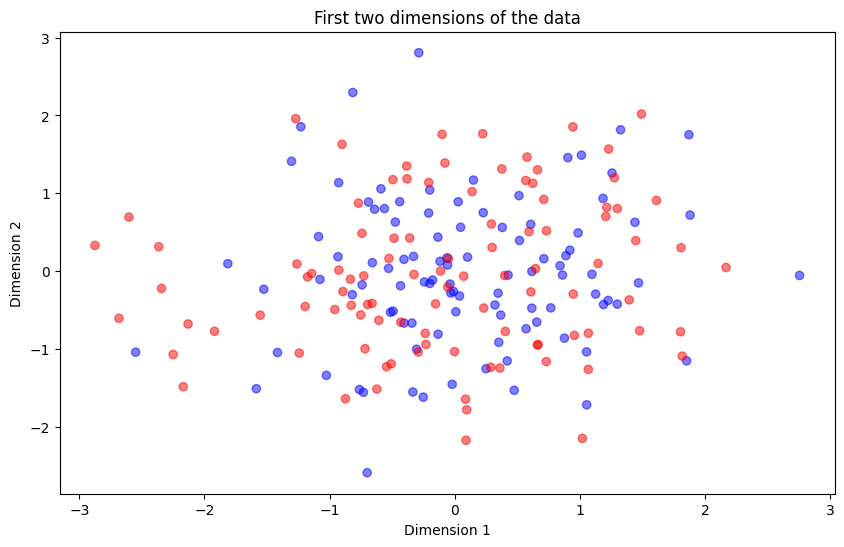

In [43]:
plt.figure(figsize=(10, 6))
colors = ['blue'] * 100 + ['red'] * 100

plt.figure(figsize=(10, 6))
plt.scatter(data[:, 0], data[:, 1], alpha=0.5, c=colors)
plt.title('First two dimensions of the data')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

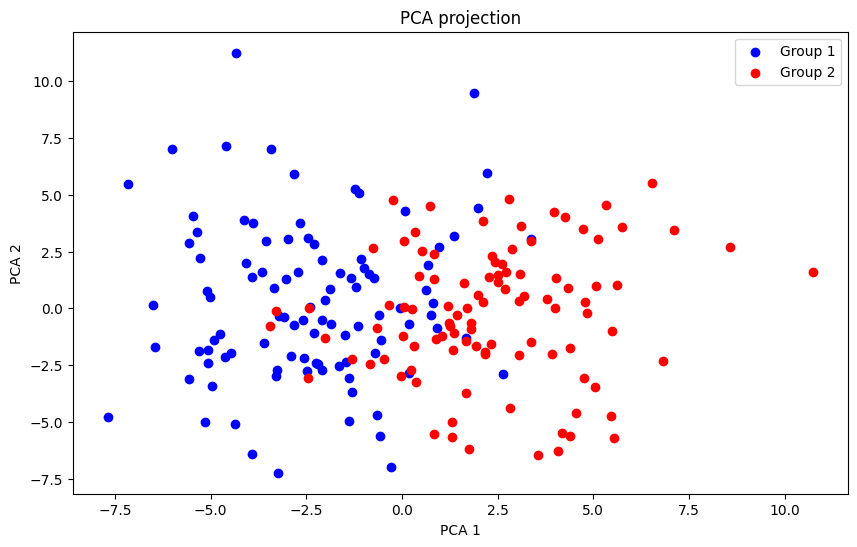

In [44]:
from sklearn.decomposition import PCA

# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(data)

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_results[:100, 0], pca_results[:100, 1], label='Group 1', color='blue')
plt.scatter(pca_results[100:, 0], pca_results[100:, 1], label='Group 2', color='red')
plt.legend()
plt.title('PCA projection')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

In [45]:
# Calculate the centroids in the original space
centroid_group1_original = np.mean(group1, axis=0)
centroid_group2_original = np.mean(group2, axis=0)

# Calculate the centroids in the PCA domain
centroid_group1_pca = np.mean(pca_results[:100], axis=0)
centroid_group2_pca = np.mean(pca_results[100:], axis=0)

print("PCA projection of the centroid of Group 1 in original space:", pca.transform([centroid_group1_original]))
print("PCA projection of the centroid of Group 2 in original space:", pca.transform([centroid_group2_original]))
print("Centroid of Group 1 in PCA domain:", centroid_group1_pca)
print("Centroid of Group 2 in PCA domain:", centroid_group2_pca)

PCA projection of the centroid of Group 1 in original space: [[-2.38651771  0.26384984]]
PCA projection of the centroid of Group 2 in original space: [[ 2.38651771 -0.26384984]]
Centroid of Group 1 in PCA domain: [-2.38651771  0.26384984]
Centroid of Group 2 in PCA domain: [ 2.38651771 -0.26384984]
